In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('bank_fraud.csv')
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3327634,253,PAYMENT,7896.23,C964423991,0.0,0.00,M1320172106,0.00,0.00,0,0
6003952,428,CASH_OUT,134018.51,C1180237263,5503.0,0.00,C1895565710,1583456.87,1717475.38,0,0
895294,42,CASH_IN,8122.41,C977886787,459.0,8581.41,C742683459,502871.63,494749.23,0,0
1201885,133,CASH_IN,180977.25,C1904724226,1499063.0,1680040.25,C1121051975,2956055.99,2775078.74,0,0
3696102,277,CASH_OUT,274378.71,C2030796638,0.0,0.00,C702235101,1251865.88,1526244.59,0,0


In [3]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [4]:
print(df.shape)

(6362620, 11)


In [3]:
df.isnull().values.any() # checking if any null values

False

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


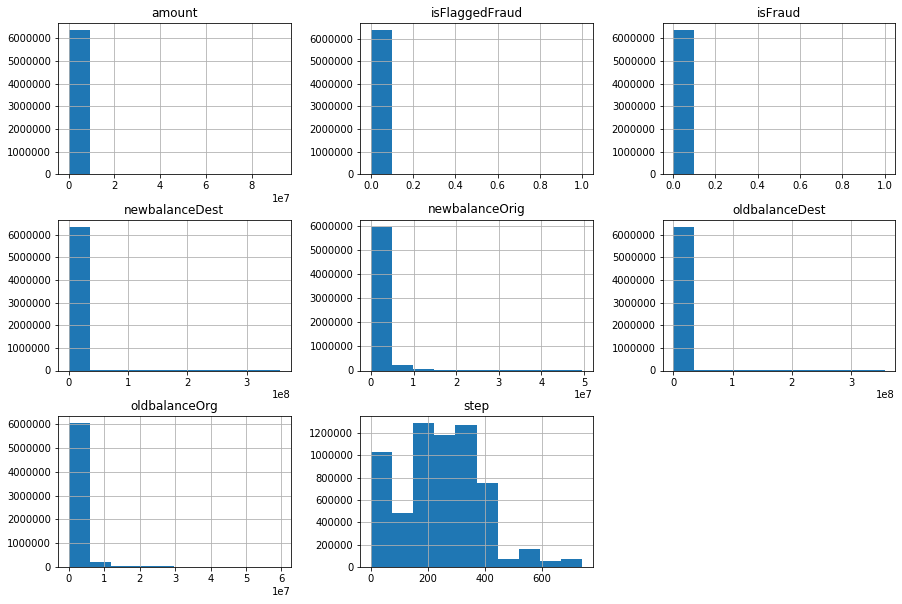

In [9]:
df.hist(figsize= (15,10))
plt.show()

In [11]:
Fraud = df[df['isFraud'] == 1]
Valid = df[df['isFraud'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print("Fraud Cases: {}".format(len(Fraud)))
print("Valid Cases: {}".format(len(Valid)))

0.0012924888191769902
Fraud Cases: 8213
Valid Cases: 6354407


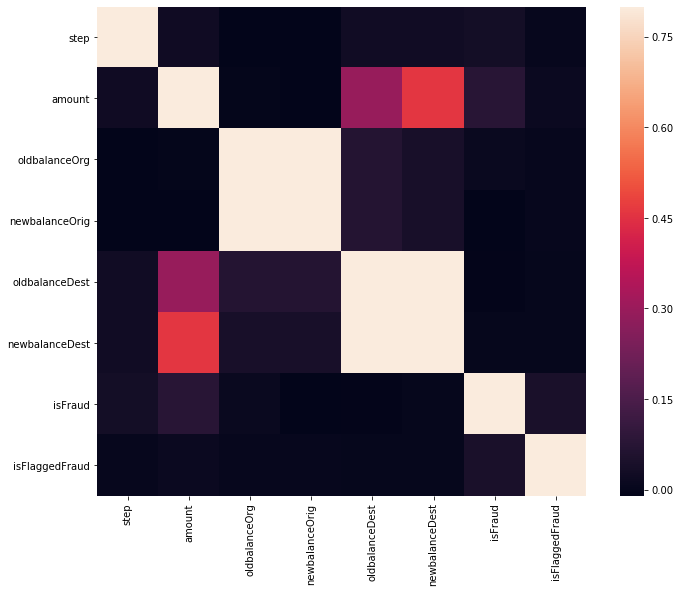

In [16]:
import seaborn as sns
corrmat = df.corr()
fig = plt.figure(figsize= (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
print("Type")
print('*'*15)
df.type.value_counts()

Type
***************


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### Data cleaning
We have seen from exploratory data analysis (EDA), that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis.

In [21]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 42
np.random.seed(randomState)

y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

print(X.shape)
print(y.shape)

(2770409, 7)
(2770409,)


In [25]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define outlier detection method
classifiers = {
    'Isolation Forest': IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state =randomState),
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20, contamination = outlier_fraction)
}

In [26]:
# fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outlier
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scored_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values o for valid, 1 for fraud
    y_pred[y_pred ==1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # run classification matrics
    print('{}:{}'.format(clf_name, n_errors))
    print('*'*60)
    print(accuracy_score(y, y_pred))
    print('*'*60)
    print(classification_report(y,y_pred))

C:\Users\Sarit\Anaconda3\envs\python\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Sarit\Anaconda3\envs\python\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest:9382
************************************************************
0.9966134964187598
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2762196
           1       0.34      0.15      0.20      8213

    accuracy                           1.00   2770409
   macro avg       0.67      0.57      0.60   2770409
weighted avg       1.00      1.00      1.00   2770409

Local Outlier Factor:11726
************************************************************
0.9957674119597504
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2762196
           1       0.01      0.00      0.01      8213

    accuracy                           1.00   2770409
   macro avg       0.50      0.50      0.50   2770409
weighted avg       0.99      1.00      0.99   2770409



 - Though over 99% accuracy, but that is because of very few fraud cases in the dataset (Fraud Cases: 8213, Valid Cases:
   6354407)
 - Isolation forest provides better output compared to local outlier. But, I suppose, there are still rooms for imporvment. We
   have taken the complete data set and able to identify 34% of anomaly in transaction. MAy be we can try with neural netwrok
   and check if we can imporve out classification score.